In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

import warnings
warnings.simplefilter('ignore')

In [2]:
def convert_to_mel_spectrogram(file_path):
  y, sr = librosa.load(file_path, sr=None)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
  mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
  return mel_spectrogram_db, sr

def plotting_mel_spectogram(spectrogram, sr):
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel Spectrogram')
  plt.tight_layout()
  plt.show()

def get_spectrogram_plot(file_path):
  spectrogram, sr = convert_to_mel_spectrogram(file_path)
  plotting_mel_spectogram(spectrogram, sr)

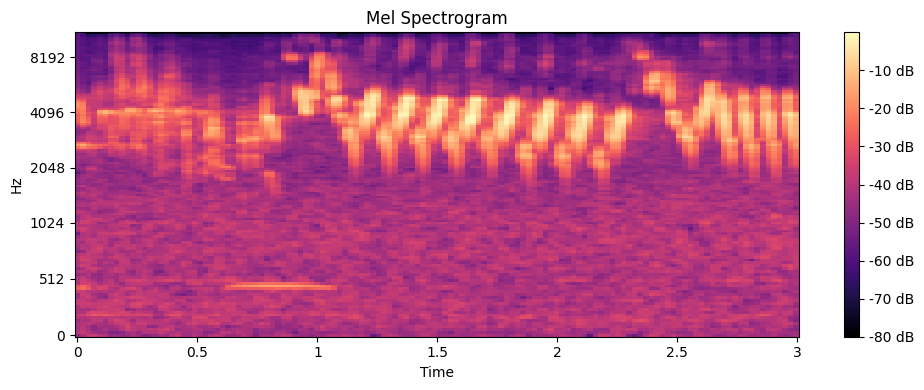

In [3]:
import os

directory_path = './wavfiles/'
files = os.listdir(directory_path)

for file in files:
    get_spectrogram_plot(f"./wavfiles/{file}")
    break

In [4]:
metadata = pd.read_csv("./bird_songs_metadata.csv")

In [5]:
metadata.shape

(5422, 18)

In [28]:
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [7]:
librosa_audio_data, librosa_sample_rate = librosa.load('./wavfiles/11713-1.wav')
print(librosa_audio_data)
print(librosa_sample_rate)

[ 0.15442057 -0.2753804  -0.5479337  ...  0.06947865  0.03835445
 -0.06795005]
22050


In [8]:
librosa_audio_data.shape


(66150,)

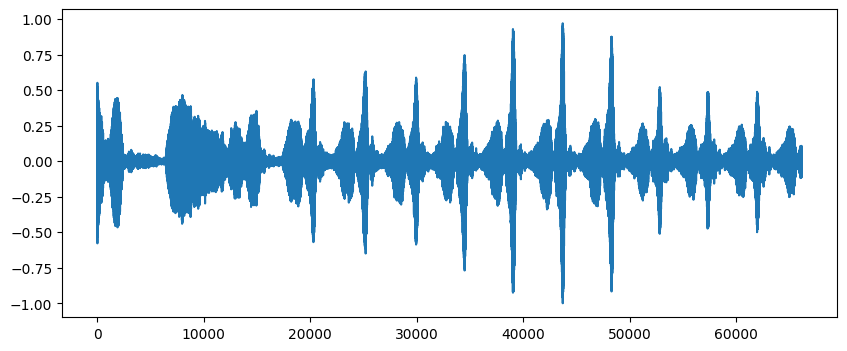

In [9]:
plt.figure(figsize=(10,4))
plt.plot(librosa_audio_data)

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc = 39)
mfccs.shape

(39, 130)

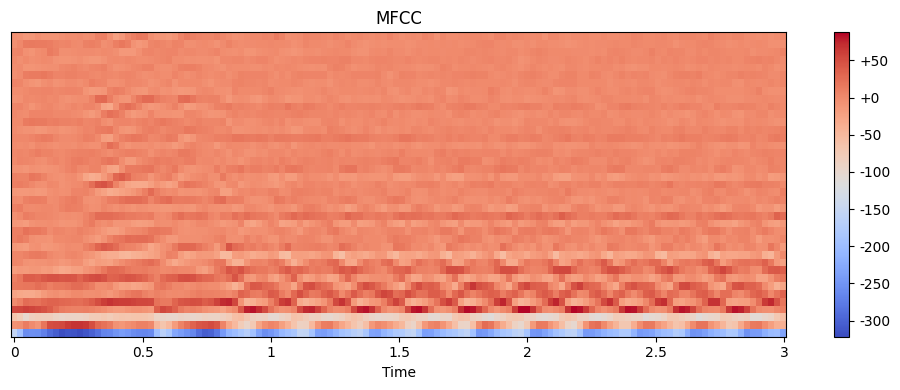

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [12]:
def get_mfcc_features(file_path):
  y, sr = librosa.load(file_path)
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=39)
  scaled_features = np.mean(mfccs.T, axis=0)
  return scaled_features

In [13]:
from tqdm import tqdm

features_and_labels = []
for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    file_name = "./wavfiles/" + row['filename']
    labels = row['name']
    scaled_features_each = get_mfcc_features(file_name)
    features_and_labels.append([scaled_features_each, labels])

100%|█████████████████████████████████████████████████████████████████████████████| 5422/5422 [00:51<00:00, 105.43it/s]


In [14]:
features_and_labels_df = pd.DataFrame(features_and_labels, columns=['features', 'labels'])
features_and_labels_df

,features,labels
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren
...,...,...
5417,"[-265.4909, 25.234488, -71.860214, 21.496227, ...",Northern Cardinal
5418,"[-229.15498, 6.058426, -86.36482, 31.295116, 1...",Northern Cardinal
5419,"[-228.50348, 9.504912, -82.236824, 27.831066, ...",Northern Cardinal
5420,"[-222.64116, 13.23448, -77.96408, 26.501926, 1...",Northern Cardinal


In [15]:
X = np.array(features_and_labels_df['features'].tolist())
Y = np.array(features_and_labels_df['labels'].tolist())

In [16]:
print(X.shape)
print(Y.shape)

(5422, 39)
(5422,)


In [17]:
y = np.array(pd.get_dummies(Y))
y = y.astype(int)

In [18]:
def get_species_name(output_array, main_array=y):
    for i in range(len(main_array)):
        if np.array_equal(main_array[i], output_array):
            return Y[i]
    return None

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [20]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(39, 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 37, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 64)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 18, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 18, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 128)           0

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
153/153 [==============================] - 7s 40ms/step - loss: 1.6300 - accuracy: 0.4007 - val_loss: 0.8981 - val_accuracy: 0.6501
Epoch 2/100
153/153 [==============================] - 6s 38ms/step - loss: 1.1883 - accuracy: 0.5210 - val_loss: 0.7878 - val_accuracy: 0.7035
Epoch 3/100
153/153 [==============================] - 6s 36ms/step - loss: 1.0561 - accuracy: 0.5673 - val_loss: 0.7922 - val_accuracy: 0.7182
Epoch 4/100
153/153 [==============================] - 6s 37ms/step - loss: 0.9682 - accuracy: 0.5987 - val_loss: 0.7331 - val_accuracy: 0.7330
Epoch 5/100
153/153 [==============================] - 6s 37ms/step - loss: 0.9266 - accuracy: 0.6264 - val_loss: 0.7033 - val_accuracy: 0.7422
Epoch 6/100
153/153 [==============================] - 6s 37ms/step - loss: 0.8764 - accuracy: 0.6440 - val_loss: 0.6619 - val_accuracy: 0.7587
Epoch 7/100
153/153 [==============================] - 5s 35ms/step - loss: 0.8460 - accuracy: 0.6569 - val_loss: 0.6552 - val_accuracy:

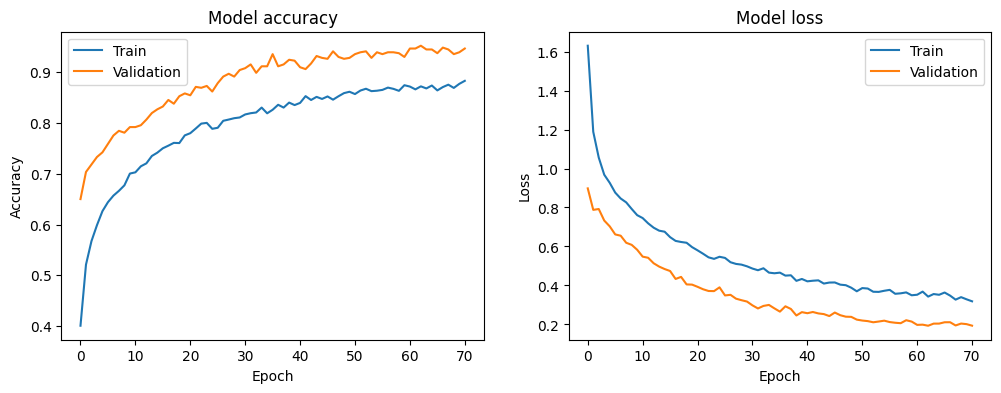

In [29]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

17/17 [==============================] - 0s 9ms/step - loss: 0.1934 - accuracy: 0.9521
Test accuracy: 0.95


In [24]:
# model_CRNN = Sequential([
#     Conv1D(117, kernel_size=3, activation='relu', input_shape=(39, 1)),
#     MaxPooling1D(pool_size=2),
#     BatchNormalization(),
#     Dropout(0.4),
    
#     TimeDistributed(Flatten()),
    
#     LSTM(264, return_sequences=True),
#     Dropout(0.3),

#     LSTM(128),
#     Dropout(0.25),
#     Dense(5, activation='softmax')
# ])

# model_CRNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model_CRNN.summary()


In [25]:
# model_CRNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [26]:
# test_loss_CRNN, test_accuracy_CRNN = model_CRNN.evaluate(X_test, y_test)
# print(f"Test accuracy: {test_accuracy_CRNN:.2f}")

In [30]:
from tensorflow.keras.layers import TimeDistributed, LSTM

model_CRNN_new = Sequential([
    Conv1D(78, kernel_size=3, activation='relu', input_shape=(39, 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.25),
    
    TimeDistributed(Flatten()),
    
    LSTM(195),
    Dropout(0.5),
    
    Dense(5, activation='softmax')
])

model_CRNN_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_CRNN_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 37, 78)            312       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 18, 78)           0         
 1D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 18, 78)           312       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 18, 78)            0         
                                                                 
 time_distributed (TimeDistr  (None, 18, 78)           0         
 ibuted)                                                         
                                                      

In [31]:
history = model_CRNN_new.fit(X_train, y_train, epochs=100, batch_size=48, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
102/102 [==============================] - 21s 185ms/step - loss: 1.4462 - accuracy: 0.3300 - val_loss: 1.2211 - val_accuracy: 0.4365
Epoch 2/100
102/102 [==============================] - 14s 141ms/step - loss: 1.1878 - accuracy: 0.4587 - val_loss: 1.0129 - val_accuracy: 0.5433
Epoch 3/100
102/102 [==============================] - 15s 143ms/step - loss: 1.0444 - accuracy: 0.5593 - val_loss: 0.8724 - val_accuracy: 0.6501
Epoch 4/100
102/102 [==============================] - 16s 152ms/step - loss: 0.9616 - accuracy: 0.6036 - val_loss: 0.8235 - val_accuracy: 0.6851
Epoch 5/100
102/102 [==============================] - 14s 142ms/step - loss: 0.8809 - accuracy: 0.6462 - val_loss: 0.7341 - val_accuracy: 0.6998
Epoch 6/100
102/102 [==============================] - 15s 146ms/step - loss: 0.8054 - accuracy: 0.6792 - val_loss: 0.7422 - val_accuracy: 0.6777
Epoch 7/100
102/102 [==============================] - 13s 128ms/step - loss: 0.7605 - accuracy: 0.7038 - val_loss: 0.6254 -

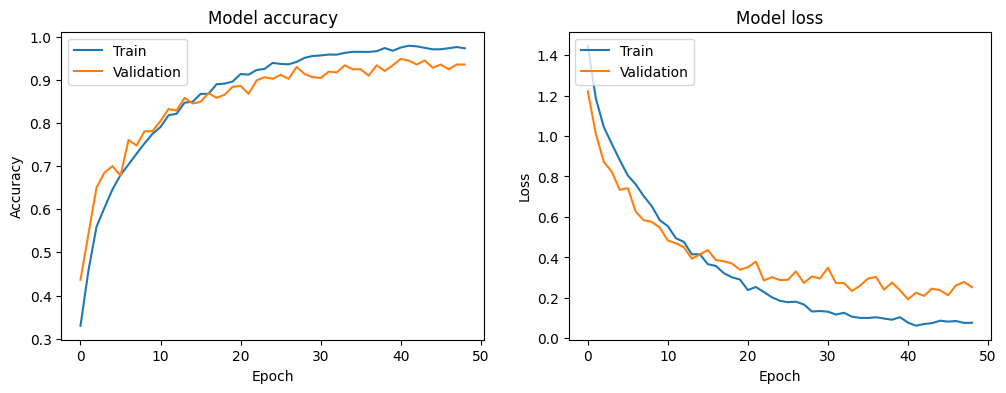

In [32]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [33]:
test_loss_CRNN_new, test_accuracy_CRNN_new = model_CRNN_new.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy_CRNN_new:.2f}")

17/17 [==============================] - 0s 4ms/step - loss: 0.1929 - accuracy: 0.9484
Test accuracy: 0.95


In [34]:
model_CRNN_newnew = Sequential([
    Conv1D(78, kernel_size=3, activation='relu', input_shape=(39, 1), padding='same'),
    MaxPooling1D(pool_size=2),  # Output shape: (None, 19, 78)
    BatchNormalization(),
    Dropout(0.25),

    Conv1D(156, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Output shape: (None, 9, 156)
    BatchNormalization(),
    Dropout(0.4),
    
    # Ensure LSTM layer processes correctly
    LSTM(195, return_sequences=True),  # Output shape: (None, 9, 195)
    Dropout(0.5),
    
    # Add another Conv1D layer if needed, else you might skip to Dense
    Conv1D(156, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),  # Output shape: (None, 4, 156)
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(78, kernel_size=3, activation='relu', padding='same'),
    # MaxPooling1D(pool_size=2),  # Output shape: (None, 3, 78)
    BatchNormalization(),
    Dropout(0.25),

    Conv1D(25, kernel_size=3, activation='relu', padding='same'),
    # MaxPooling1D(pool_size=2),  # Output shape: (None, 1, 25)
    BatchNormalization(),
    Dropout(0.2),
    
    Flatten(),  # Flatten before the Dense layer
    Dense(5, activation='softmax')
])

model_CRNN_newnew.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_CRNN_newnew.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 39, 78)            312       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 19, 78)           0         
 1D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 19, 78)           312       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 19, 78)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 19, 156)           36660     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 9, 156)          

In [35]:
history = model_CRNN_newnew.fit(X_train, y_train, epochs=100, batch_size=48, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
102/102 [==============================] - 22s 189ms/step - loss: 1.8441 - accuracy: 0.2878 - val_loss: 1.4331 - val_accuracy: 0.3278
Epoch 2/100
102/102 [==============================] - 17s 169ms/step - loss: 1.3952 - accuracy: 0.4025 - val_loss: 1.0759 - val_accuracy: 0.4954
Epoch 3/100
102/102 [==============================] - 17s 167ms/step - loss: 1.2117 - accuracy: 0.4702 - val_loss: 0.9411 - val_accuracy: 0.6059
Epoch 4/100
102/102 [==============================] - 16s 160ms/step - loss: 1.1227 - accuracy: 0.5241 - val_loss: 0.9031 - val_accuracy: 0.6335
Epoch 5/100
102/102 [==============================] - 17s 169ms/step - loss: 1.0734 - accuracy: 0.5462 - val_loss: 0.8398 - val_accuracy: 0.6501
Epoch 6/100
102/102 [==============================] - 16s 161ms/step - loss: 1.0101 - accuracy: 0.5698 - val_loss: 0.7841 - val_accuracy: 0.6667
Epoch 7/100
102/102 [==============================] - 17s 169ms/step - loss: 0.9714 - accuracy: 0.5956 - val_loss: 0.7375 -

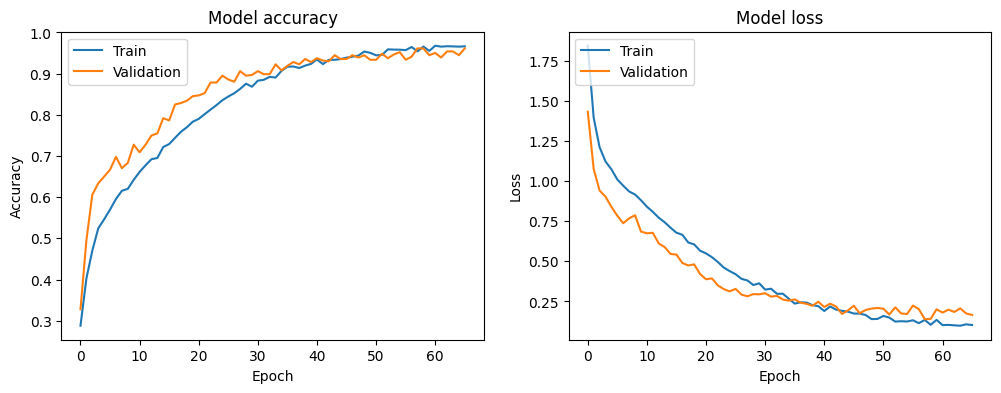

In [36]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [37]:
test_loss_CRNN_newnew, test_accuracy_CRNN_newnew = model_CRNN_newnew.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy_CRNN_newnew:.2f}")

17/17 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9613
Test accuracy: 0.96


In [ ]:
directory_path = './TESTFILE/'
files = os.listdir(directory_path)

for file in files:
    mfccs = get_mfcc_features(f"./TESTFILE/{file}")
    mfccs = mfccs.reshape(1,39,1)
    
    result = model_CRNN_newnew.predict(mfccs)
    predicted_index = np.argmax(result)
    
    predicted_one_hot = np.zeros(y.shape[1])
    predicted_one_hot[predicted_index] = 1

    print(predicted_one_hot)

    # predicted_bird = get_species_name(predicted_one_hot)

    # print(f"Prediction for {file}: {predicted_bird} (Probability: {result[0][predicted_index]})")